<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/EDA_case_study_shaliha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#df = pd.read_excel("/content/Sample - Superstore.xls")

In [7]:
xlsheet=pd.ExcelFile('/content/Sample - Superstore.xls')#to get the sheet names in an excel file
xlsheet.sheet_names

['Orders', 'People', 'Returns']

In [39]:
df = xlsheet.parse('Orders')
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [40]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
df2 = xlsheet.parse('People')
display(df2)

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [15]:
df3= xlsheet.parse('Returns')
display(df3)

,Returned,Order ID
0,Yes,CA-2015-100762
1,Yes,CA-2015-100762
2,Yes,CA-2015-100762
3,Yes,CA-2015-100762
4,Yes,CA-2015-100867
...,...,...
795,Yes,US-2018-147886
796,Yes,US-2018-147998
797,Yes,US-2018-151127
798,Yes,US-2018-155999


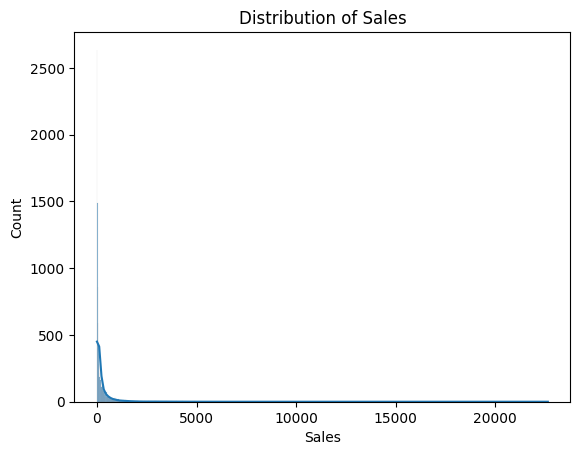

In [28]:
# Histogram of Sales
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

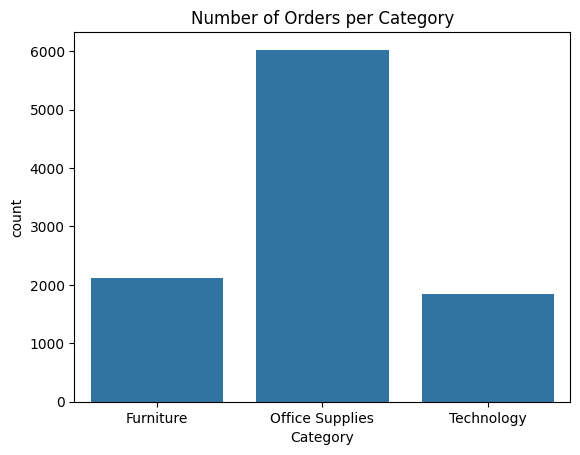

In [29]:
# Count plot of Category
sns.countplot(data=df, x='Category')
plt.title('Number of Orders per Category')
plt.show()


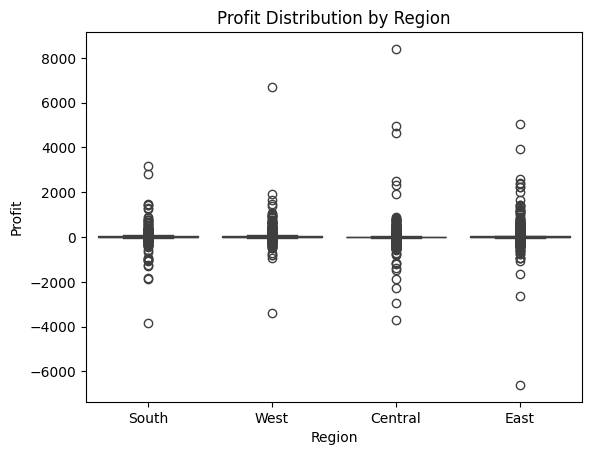

In [30]:
# Boxplot of Profit by Region
sns.boxplot(data=df, x='Region', y='Profit')
plt.title('Profit Distribution by Region')
plt.show()

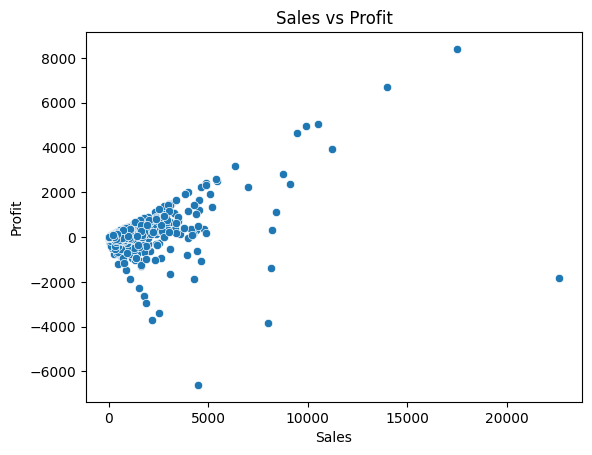

In [31]:
# Scatter plot of Sales vs Profit
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('Sales vs Profit')
plt.show()


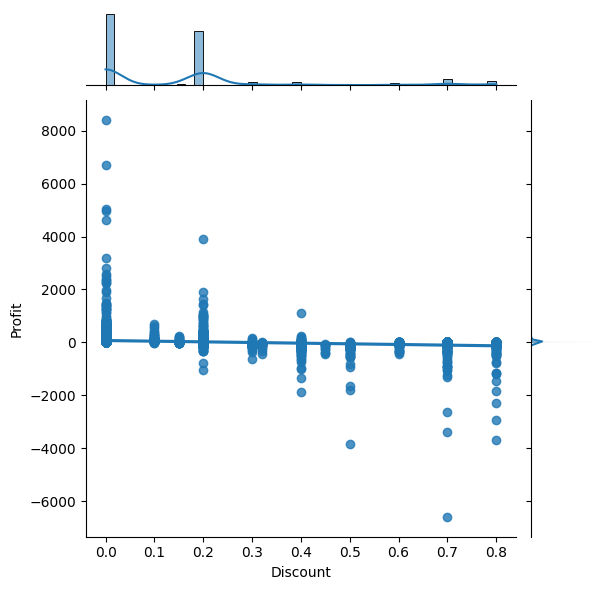

In [32]:
# Joint plot with regression line
sns.jointplot(data=df, x='Discount', y='Profit', kind='reg')
plt.show()

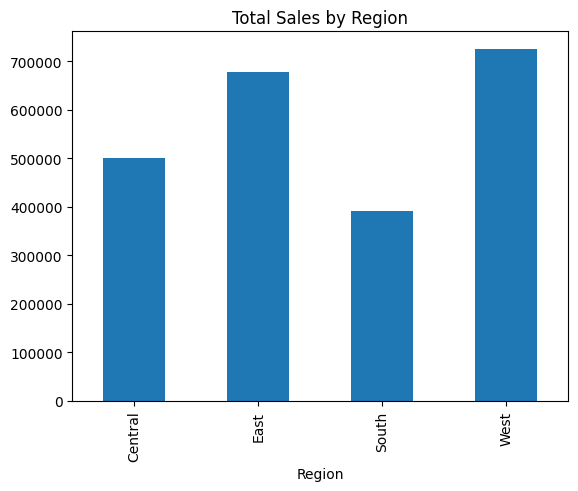

In [33]:
# Bar plot of total Sales by Region
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Region')
plt.show()

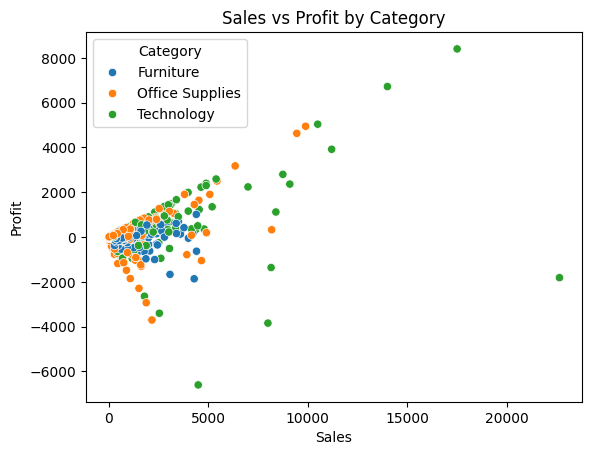

In [34]:
# Scatter plot with hue for Category
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.show()

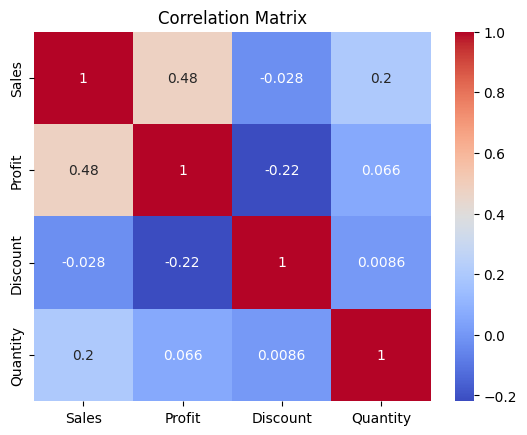

In [35]:
# Heatmap of correlation between numerical variables
corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

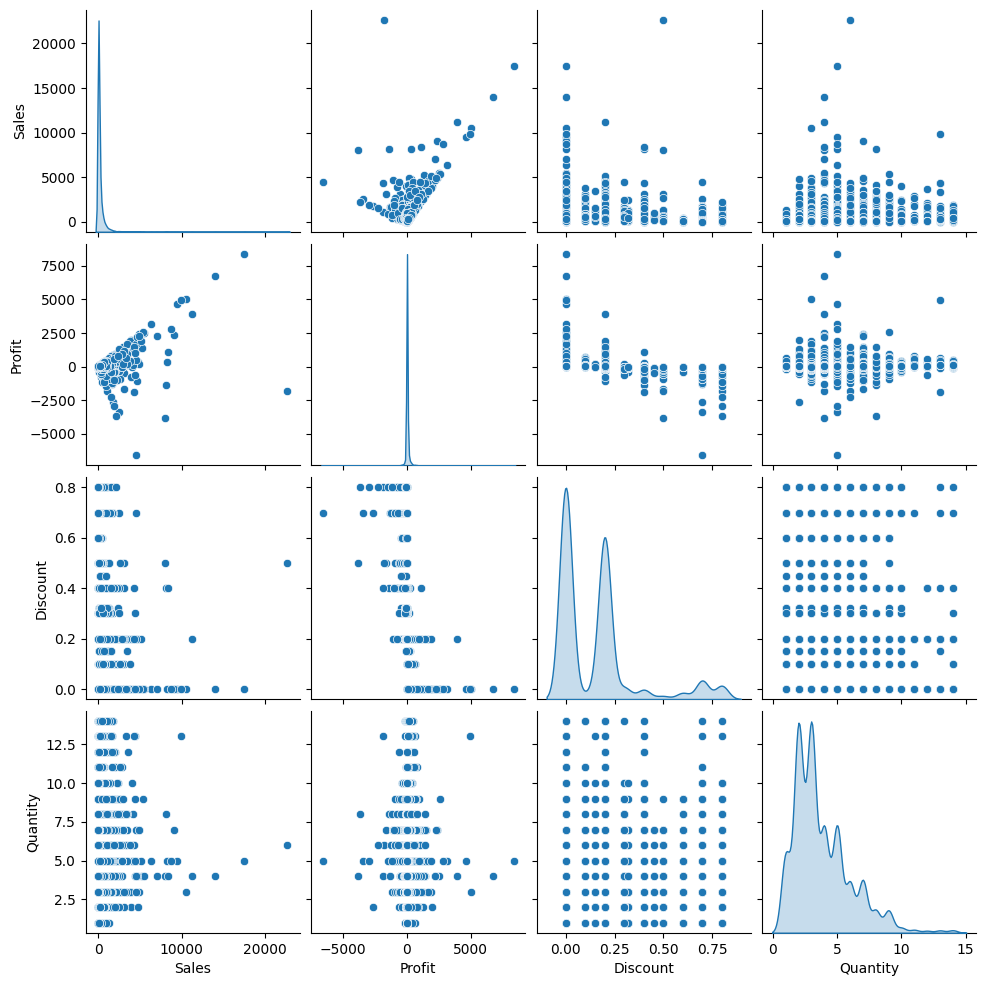

In [36]:
# Pair plot
sns.pairplot(df[['Sales', 'Profit', 'Discount', 'Quantity']], diag_kind='kde')
plt.show()

/tmp/ipython-input-2871116510.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_profit_over_time = df.resample('M', on='Order Date')[['Sales', 'Profit']].sum()


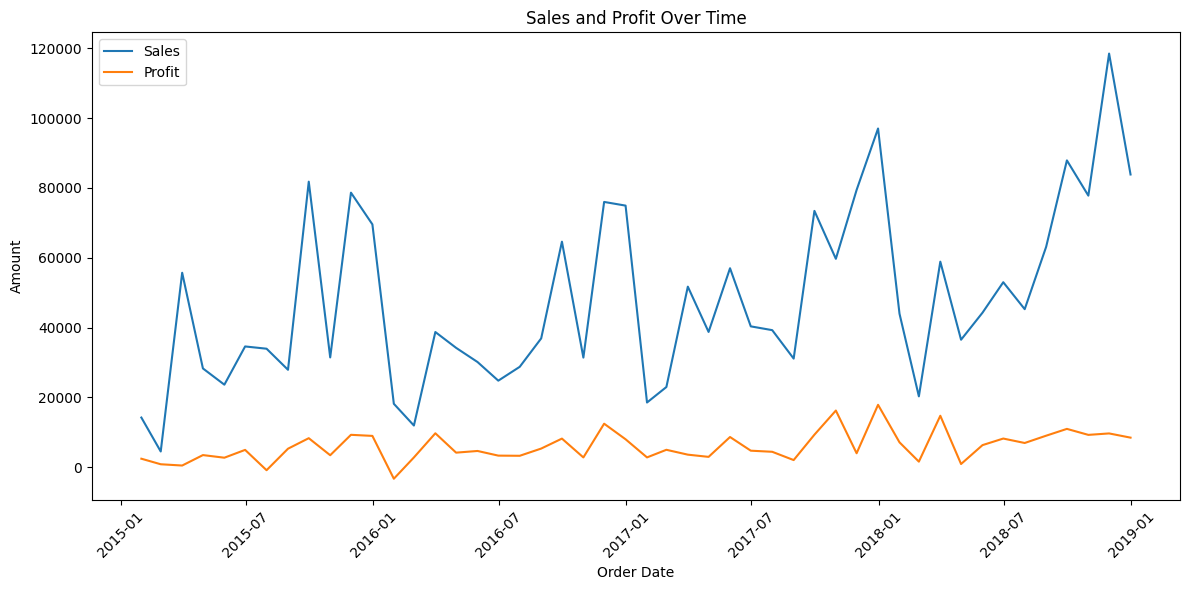

In [37]:
# Group by month or date depending on the data size
sales_profit_over_time = df.resample('M', on='Order Date')[['Sales', 'Profit']].sum()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_profit_over_time, x=sales_profit_over_time.index, y='Sales', label='Sales')
sns.lineplot(data=sales_profit_over_time, x=sales_profit_over_time.index, y='Profit', label='Profit')

plt.title('Sales and Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


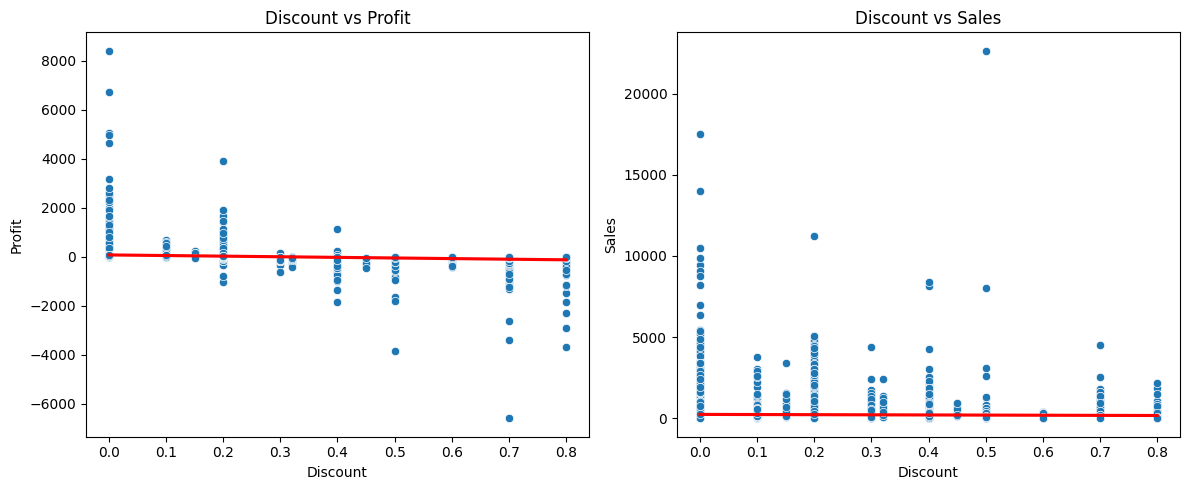

In [38]:
# Scatter plot of Discount vs Profit
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Discount', y='Profit')
sns.regplot(data=df, x='Discount', y='Profit', scatter=False, color='red')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

# Scatter plot of Discount vs Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Discount', y='Sales')
sns.regplot(data=df, x='Discount', y='Sales', scatter=False, color='red')
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()